In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
path='https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/datacleaning/movie_metadata.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print('shape of movie data =',df.shape)
print('features =',df.columns)

shape of movie data = (5043, 28)
features = Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
from collections import Counter
Counter(df.dtypes)

Counter({dtype('O'): 12, dtype('float64'): 13, dtype('int64'): 3})

In [9]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
df.isnull().values.any() 

True

In [15]:
df.isnull().sum().sum()

2698

In [17]:
#clean_movies_df = movies_df.dropna(how='any')
df = df.dropna(how='any')

In [19]:
df.shape   # with drooped null values

(3756, 28)

In [20]:
df_raw=pd.read_csv(path)

In [22]:
df_raw.shape

(5043, 28)

In [24]:
#df.isna().any()

In [25]:
#for filling up missing values in all columns  
df_raw.fillna(value=0, inplace=True)

In [27]:
df_raw.isna().sum().sum()

0

In [28]:
# for some specfific columns we can just choose select those columns 
# df[['gross', 'budget']]=f[['gross', 'budget']].fillna(value=0)
# filling with the mean
#df['budget'].fillna(df[budget].mean(), inplace=True) 


In [29]:
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (33, 28)


In [32]:
duplicate_rows_df.head(4)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


In [35]:
df['movie_imdb_link'].head(3)

0    http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1    http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2    http://www.imdb.com/title/tt2379713/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

In [36]:
duplicate_rows_df_imdb_link = df[df.duplicated(['movie_imdb_link'])]

In [37]:
duplicate_rows_df_imdb_link.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000


In [38]:
print("shape of duplicate dataframe with same imdb link", duplicate_rows_df_imdb_link.shape)

shape of duplicate dataframe with same imdb link (100, 28)


In [40]:
len(df.movie_imdb_link.unique())

3656

In [42]:
#select duplicate rows except first occurences, consider all columns  
duplicate_rows_df = df[df.duplicated()]
print(type(duplicate_rows_df)) # dataframe 
print(duplicate_rows_df.shape)

<class 'pandas.core.frame.DataFrame'>
(33, 28)


In [45]:
print("shape of dataframe before dropping duplicates", df_raw.shape)
print ("shape of dataframe after dropping duplicates", df_raw.drop_duplicates().shape)

shape of dataframe before dropping duplicates (5043, 28)
shape of dataframe after dropping duplicates (4998, 28)


**discretization or binning**

In [46]:
print(df['imdb_score'][5:10])
# check the miminmum value of all columns
print ("minimum values of all cloumn:",) 
#print '\n'
print(df.min())

6     6.2
7     7.8
8     7.5
9     7.5
10    6.9
Name: imdb_score, dtype: float64
minimum values of all cloumn:
color                                                          Black and White
director_name                                                  Aaron Schneider
num_critic_for_reviews                                                       2
duration                                                                    37
director_facebook_likes                                                      0
actor_3_facebook_likes                                                       0
actor_2_name                                                           50 Cent
actor_1_facebook_likes                                                       0
gross                                                                      162
genres                                                                  Action
actor_1_name                                                           50 Cent
movie_title       

In [48]:
print(df['imdb_score'].idxmax())

1937


In [51]:
movies_df=df
print(movies_df.loc[movies_df['imdb_score'].idxmax(), 'movie_title'])
print(movies_df['movie_title'].loc[2764:2767])
print(movies_df['budget'].idxmax())
print (movies_df[['movie_title','budget']].loc[2986:2990])

The Shawshank Redemption 
2764           Pretty Woman 
2766    Crocodile Dundee II 
Name: movie_title, dtype: object
2988
       movie_title        budget
2986   Two Lovers   1.200000e+07
2987  Last Orders   1.200000e+07
2988     The Host   1.221550e+10
2990     Ravenous   1.200000e+07


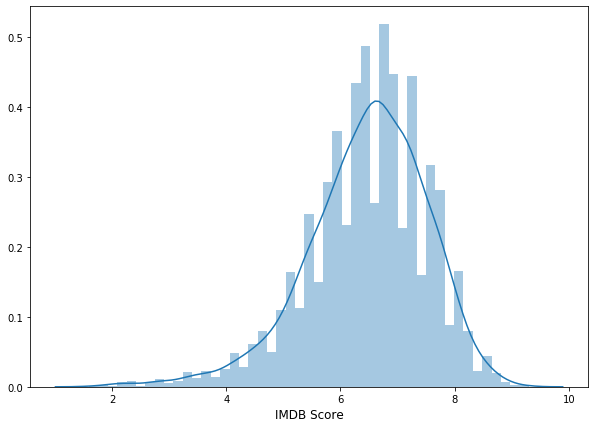

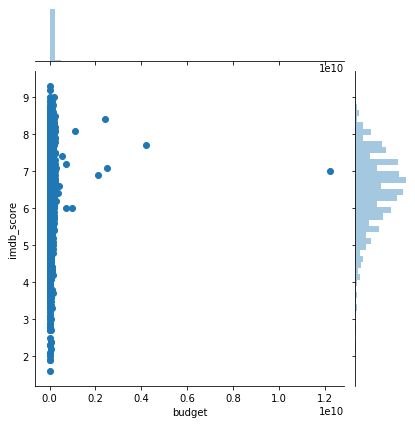

In [52]:
# check the distribution of imdb score
fig = plt.figure(figsize=(10,7))
sns.distplot(movies_df['imdb_score'])
plt.xlabel('IMDB Score', fontsize=12)
sns.jointplot(x='budget', y='imdb_score', data=movies_df); 
plt.show()

In [53]:
# based on the 'imdb_score' we will discritize the movies in 3 categories ['shyte', 'moderate', 'good']
# similar with pd.cut method described in McKinney's book
op_labels = ['shyttte', 'moderate', 'good']
category = [0.,4.,7.,10.]
movies_df['imdb_labels'] = pd.cut(movies_df['imdb_score'], labels=op_labels, bins=category, include_lowest=False)
print(movies_df[['movie_title', 'imdb_score', 'imdb_labels']][209:220])

                                 movie_title  imdb_score imdb_labels
218          How the Grinch Stole Christmas          6.0    moderate
219                  The Day After Tomorrow          6.4    moderate
220                  Mission: Impossible II          6.1    moderate
221                       The Perfect Storm          6.4    moderate
222  Fantastic 4: Rise of the Silver Surfer          5.6    moderate
223                              Life of Pi          8.0        good
224                             Ghost Rider          5.2    moderate
225                            Jason Bourne          7.1        good
226         Charlie's Angels: Full Throttle          4.8    moderate
227                              Prometheus          7.0    moderate
228                         Stuart Little 2          5.4    moderate


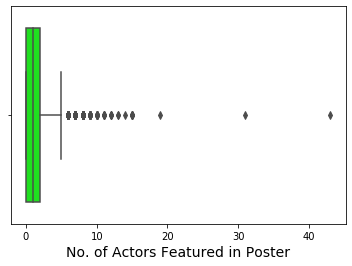

In [60]:
# let's try to plot boxplot with seaborn 
sns.boxplot(x=df_raw['facenumber_in_poster'], color='lime')
plt.xlabel('No. of Actors Featured in Poster', fontsize=14)
plt.show()

In [61]:
print("min no", df_raw['facenumber_in_poster'].min())
print("max no: index", df_raw['facenumber_in_poster'].idxmax())
print(df_raw[['movie_title', 'facenumber_in_poster']].iloc[df_raw['facenumber_in_poster'].idxmax()])
print(df_raw['facenumber_in_poster'].describe())

min no 0.0
max no: index 3468
movie_title             500 Days of Summer 
facenumber_in_poster                     43
Name: 3468, dtype: object
count    5043.000000
mean        1.367638
std         2.012180
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64


In [62]:
# budget column is massively varying. so we are in dire need to drop outliers
#best option for dropping outliers is to use zscore method and reject all rows in non-object type columns 



In [63]:
movies_df_num = df_raw.select_dtypes(exclude=['object'])

In [64]:
print("shape after excluding object columns: ", movies_df_num.shape )
#12 object type columns were dropped. 

shape after excluding object columns:  (5043, 16)


In [65]:
#use z score for all columns in the new data frame 
movies_df_Zscore = movies_df_num[(np.abs(stats.zscore(movies_df_num))<=3).all(axis=1)]
#print "shape after rejecting outliers: ", movies_df_Zscore.shape
movies_df_Zscore_usr_rev = movies_df_num[(np.abs(stats.zscore(movies_df_num[['num_user_for_reviews']]))<=3).all(axis=1)]
print(type(movies_df_Zscore_usr_rev))

<class 'pandas.core.frame.DataFrame'>


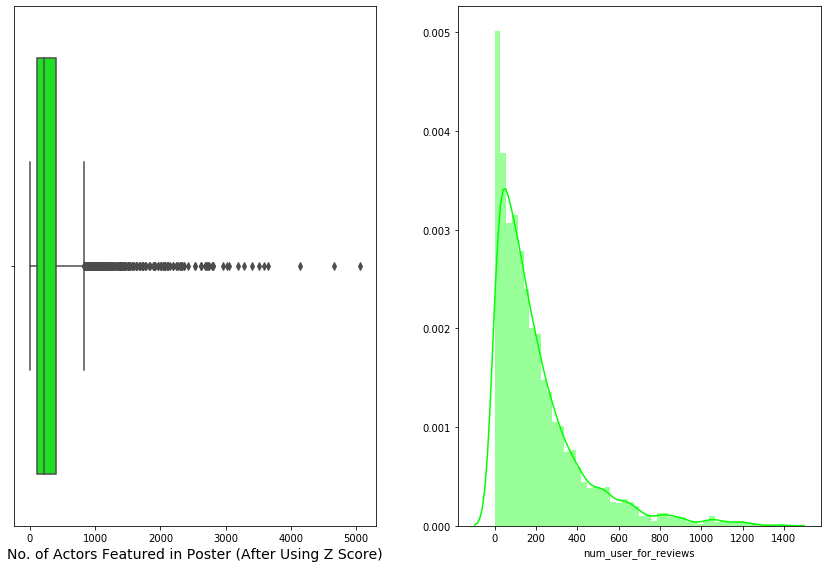

In [66]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies_df['num_user_for_reviews'], color='lime')
plt.xlabel('No. of Actors Featured in Poster (After Using Z Score)', fontsize=14)
plt.subplot(1,2,2)
sns.distplot(movies_df_Zscore['num_user_for_reviews'], color='lime')
plt.tight_layout()
plt.show()

In [67]:
movies_num_usr_rev= movies_df[np.abs(movies_df.num_user_for_reviews-movies_df.num_user_for_reviews.mean()) <= (3*movies_df.num_user_for_reviews.std())]
print(type(movies_num_usr_rev))
print(movies_num_usr_rev.head(3))

<class 'pandas.core.frame.DataFrame'>
   color   director_name  num_critic_for_reviews  duration  \
1  Color  Gore Verbinski                   302.0     169.0   
2  Color      Sam Mendes                   602.0     148.0   
5  Color  Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
1                    563.0                  1000.0    Orlando Bloom   
2                      0.0                   161.0     Rory Kinnear   
5                    475.0                   530.0  Samantha Morton   

   actor_1_facebook_likes        gross                     genres  ...  \
1                 40000.0  309404152.0   Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0  Action|Adventure|Thriller  ...   
5                   640.0   73058679.0    Action|Adventure|Sci-Fi  ...   

  language country  content_rating       budget title_year  \
1  English     USA           PG-13  300000000.0     2007.0   
2  Engl

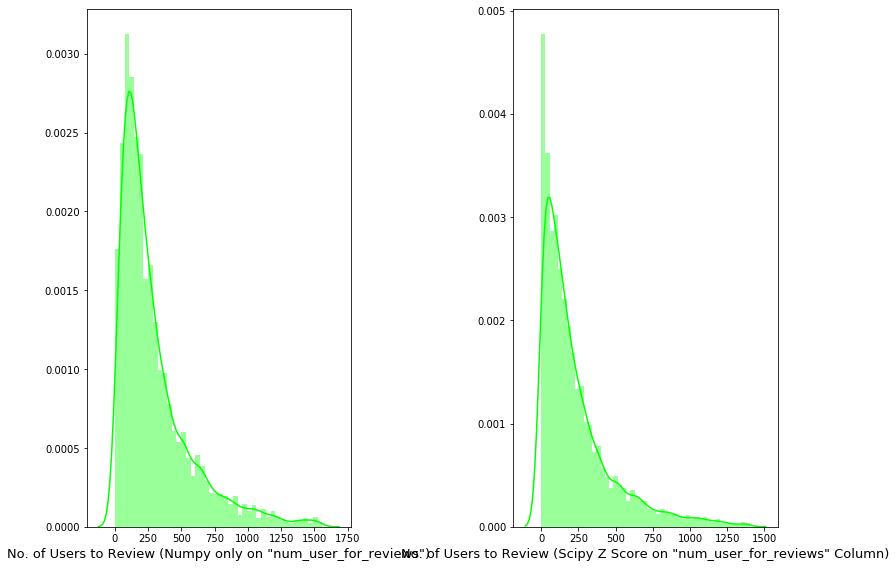

In [68]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(movies_num_usr_rev['num_user_for_reviews'], color='lime')
plt.xlabel('No. of Users to Review (Numpy only on "num_user_for_reviews")', fontsize=13)
plt.subplot(1,2,2)
sns.distplot(movies_df_Zscore_usr_rev['num_user_for_reviews'], color='lime')
plt.xlabel('No. of Users to Review (Scipy Z Score on "num_user_for_reviews" Column)', fontsize=13)
plt.tight_layout()
plt.show()

In [69]:
movies_df['budget_zscore'] = movies_df['budget'].stats

AttributeError: 'Series' object has no attribute 'stats'

In [70]:
type(stats.zscore(movies_df['budget']))

numpy.ndarray

In [71]:
budg_zsc = stats.zscore(movies_df['budget'])
budg_zsc

array([ 0.84415869,  1.12294418,  0.87956003, ..., -0.20457478,
       -0.20457478, -0.20460089])

In [72]:
print(np.where(budg_zsc > 3.0)[0])

[2136 2146 2681 2696 2983 3259 3571]


In [75]:
print(budg_zsc[3259])
print(budg_zsc[100:133]) # only nan ? because the nan values aren't dropped yet

18.38109335256886
[0.50342088 0.54767254 0.50342088 0.50342088 0.48129504 0.48129504
 0.41491755 0.45916921 0.48129504 0.45916921 0.45916921 0.45916921
 0.45916921 0.45916921 0.45916921 0.45916921 0.45916921 0.45916921
 0.45916921 0.45916921 0.45916921 0.45916921 0.54767254 0.45916921
 0.45916921 0.45916921 0.45916921 0.45916921 0.45916921 0.23791089
 0.45916921 0.45916921 0.59192421]


In [77]:
print (type( (movies_df.budget - movies_df.budget.mean())/movies_df.budget.std(ddof=0)))
mov_df_budget_zscore = (movies_df.budget - movies_df.budget.mean())/movies_df.budget.std(ddof=0)
print(mov_df_budget_zscore[100:131])
mov_budg_zsc_arr =  mov_df_budget_zscore.values
print(mov_budg_zsc_arr[50:55])
print(np.where(mov_budg_zsc_arr > .60)[0]) 		 


<class 'pandas.core.series.Series'>
105    0.503421
106    0.547673
107    0.503421
108    0.503421
109    0.481295
110    0.481295
111    0.414918
112    0.459169
113    0.481295
114    0.459169
115    0.459169
116    0.459169
117    0.459169
118    0.459169
119    0.459169
120    0.459169
121    0.459169
122    0.459169
123    0.459169
124    0.459169
125    0.459169
126    0.459169
127    0.547673
128    0.459169
129    0.459169
130    0.459169
131    0.459169
132    0.459169
133    0.459169
134    0.237911
135    0.459169
Name: budget, dtype: float64
[0.68042753 0.63617587 0.6583017  0.61405004 0.61405004]
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   24   25   26   27   29
   30   31   32   33   34   35   36   37   38   40   41   42   43   44
   45   46   47   48   50   51   52   53   54   55   58   59   64   78
   85   91  755  963 1262 1892 2136 2146 2478 2681 2696 2743 2910 2983
 3003 3030 3142 3255 3259 3